In [3]:
import analytical_solutions
%matplotlib inline

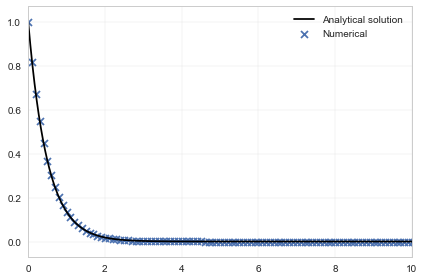

In [4]:
analytical_solutions.reaction_equation_plot()

Simulation starts  with following params:
	tend = 5.0,
	dt = 1.00e-03,
	L = 100.0,
	dx = 1.00e-01,
	w = 5.00
Simulation started:
	 2017-05-31 16:51:04


Estimated time of the code execution:
	 0h:00m:03s
Will finish approx.:
	 2017-05-31 16:51:08


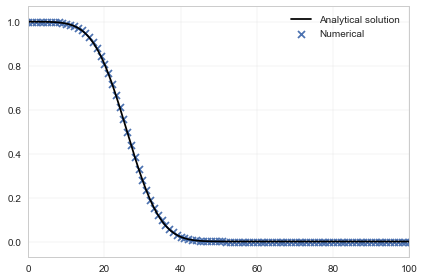

In [7]:
analytical_solutions.transport_equation_plot()